# Importing libraries and Datasets

In [4]:
import pandas as pd
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import datetime


In [5]:
df = pd.read_csv("test.csv", usecols=["MSSubClass","MSZoning","LotFrontage","LotArea","Street","YearBuilt","LotShape","1stFlrSF","2ndFlrSF"])

In [6]:
df.isna().sum()

MSSubClass       0
MSZoning         4
LotFrontage    227
LotArea          0
Street           0
LotShape         0
YearBuilt        0
1stFlrSF         0
2ndFlrSF         0
dtype: int64

In [7]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [8]:
df.isna().sum()

MSSubClass     0
MSZoning       4
LotFrontage    0
LotArea        0
Street         0
LotShape       0
YearBuilt      0
1stFlrSF       0
2ndFlrSF       0
dtype: int64

In [9]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [10]:
df.isna().sum()

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
LotShape       0
YearBuilt      0
1stFlrSF       0
2ndFlrSF       0
dtype: int64

In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF
0,20,RH,80.0,11622,Pave,Reg,1961,896,0
1,20,RL,81.0,14267,Pave,IR1,1958,1329,0
2,60,RL,74.0,13830,Pave,IR1,1997,928,701
3,60,RL,78.0,9978,Pave,IR1,1998,926,678
4,120,RL,43.0,5005,Pave,IR1,1992,1280,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1459 non-null   int64  
 1   MSZoning     1459 non-null   object 
 2   LotFrontage  1459 non-null   float64
 3   LotArea      1459 non-null   int64  
 4   Street       1459 non-null   object 
 5   LotShape     1459 non-null   object 
 6   YearBuilt    1459 non-null   int64  
 7   1stFlrSF     1459 non-null   int64  
 8   2ndFlrSF     1459 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 102.7+ KB


In [13]:
for i in df.columns:
    print("Column Name: {} and unique values: {}". format(i, len(df[i].unique())))

Column Name: MSSubClass and unique values: 16
Column Name: MSZoning and unique values: 5
Column Name: LotFrontage and unique values: 116
Column Name: LotArea and unique values: 1106
Column Name: Street and unique values: 2
Column Name: LotShape and unique values: 4
Column Name: YearBuilt and unique values: 106
Column Name: 1stFlrSF and unique values: 789
Column Name: 2ndFlrSF and unique values: 407


### ~All the features that have limited variations in their values have to be converted into categorical data

In [14]:
datetime.datetime.now().year

2024

In [15]:
df['Total_Years'] = datetime.datetime.now().year - df["YearBuilt"]


In [16]:
df.drop("YearBuilt",axis = 1,inplace=True)

In [17]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'Total_Years'],
      dtype='object')

In [18]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,Total_Years
0,20,RH,80.0,11622,Pave,Reg,896,0,63
1,20,RL,81.0,14267,Pave,IR1,1329,0,66
2,60,RL,74.0,13830,Pave,IR1,928,701,27
3,60,RL,78.0,9978,Pave,IR1,926,678,26
4,120,RL,43.0,5005,Pave,IR1,1280,0,32


### ~Applying Label Encoding

In [19]:
# Creating Categorcal Data
cat_features = ['MSSubClass', 'MSZoning','Street','LotShape']
out_feature = "SalePrice"

In [20]:
lbl_encoders={} 
lbl_encoders["MSSubClass"] = LabelEncoder() 
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([0, 0, 5, ..., 0, 9, 5])

In [21]:
lbl_encoders={} 
for feature in cat_features:
    lbl_encoders[feature] = LabelEncoder()
    df[feature] = lbl_encoders[feature].fit_transform(df[feature])

In [22]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,Total_Years
0,0,2,80.0,11622,1,3,896,0,63
1,0,3,81.0,14267,1,0,1329,0,66
2,5,3,74.0,13830,1,0,928,701,27
3,5,3,78.0,9978,1,0,926,678,26
4,11,3,43.0,5005,1,0,1280,0,32


### ~Applying Embedding:

In [23]:
## Stacking and COnverting into Tensors

cat_features = np.stack([df['MSSubClass'], df['MSZoning'],df['Street'] , df['LotShape']] , axis=1)
cat_features

array([[0, 2, 1, 3],
       [0, 3, 1, 0],
       [5, 3, 1, 0],
       ...,
       [0, 3, 1, 3],
       [9, 3, 1, 3],
       [5, 3, 1, 3]])

In [24]:
## COnvert numpy arrays to tensors

cat_features = torch.tensor(cat_features, dtype=torch.int64)  # Very important to convert categorical data types into int date type.
cat_features

tensor([[0, 2, 1, 3],
        [0, 3, 1, 0],
        [5, 3, 1, 0],
        ...,
        [0, 3, 1, 3],
        [9, 3, 1, 3],
        [5, 3, 1, 3]])

In [25]:
## Create Continuous Variables
cont_feature = []

for i in df.columns:
    if i in ['MSSubClass', 'MSZoning','Street','LotShape']:
        pass
    else:
        cont_feature.append(i)
        


In [26]:
cont_feature

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total_Years']

In [27]:
## Stacking Continuos Variables:
cont_values = np.stack([df[i].values for i in cont_feature] , axis=1)
cont_values = torch.tensor(cont_values , dtype=torch.float)
cont_values

tensor([[   80., 11622.,   896.,     0.,    63.],
        [   81., 14267.,  1329.,     0.,    66.],
        [   74., 13830.,   928.,   701.,    27.],
        ...,
        [  160., 20000.,  1224.,     0.,    64.],
        [   62., 10441.,   970.,     0.,    32.],
        [   74.,  9627.,   996.,  1004.,    31.]])

In [28]:
cont_values.dtype

torch.float32

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1459 non-null   int64  
 1   MSZoning     1459 non-null   int64  
 2   LotFrontage  1459 non-null   float64
 3   LotArea      1459 non-null   int64  
 4   Street       1459 non-null   int64  
 5   LotShape     1459 non-null   int64  
 6   1stFlrSF     1459 non-null   int64  
 7   2ndFlrSF     1459 non-null   int64  
 8   Total_Years  1459 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.7 KB


In [30]:
len(df['MSSubClass'].unique())

16

# Embedding:
#### Each categories are converted to their feature vector representation using Embedded Matrix whose dimension is:
##### By thumb rule : min(50, (x+1)//2) for Categorical Data Conversion but not for NLP applications.

In [31]:
## Embedding Size for Categorical Features:

cat_dims = [(len(df[col].unique())) for col in ['MSSubClass', 'MSZoning','Street','LotShape']]

In [32]:
cat_dims

[16, 5, 2, 4]

In [33]:
# Creating Embedded Vector dimensions using thumb rule

embedding_dims = [(x, min(50,(x+1)//2)) for x in cat_dims]

In [34]:
embedding_dims

[(16, 8), (5, 3), (2, 1), (4, 2)]

### CREATING ACTUAL EMBEDDING MATRIX: DOING WORD2VEC 

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [36]:
embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dims])
embed_representation

ModuleList(
  (0): Embedding(16, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [37]:
cat_featuresz = cat_features[:4]
cat_featuresz

tensor([[0, 2, 1, 3],
        [0, 3, 1, 0],
        [5, 3, 1, 0],
        [5, 3, 1, 0]])

In [38]:
# ACTUAL EMBEDDING FUNCTION:

pd.set_option('display.max_rows',500)
embedding_val = []
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_featuresz[:,i]))

In [39]:
embedding_val

[tensor([[-1.3782, -0.2115,  0.5782,  1.2140,  0.3704,  1.0138, -0.3132, -1.0376],
         [-1.3782, -0.2115,  0.5782,  1.2140,  0.3704,  1.0138, -0.3132, -1.0376],
         [ 1.0092,  0.4834,  1.2568,  1.2497, -0.2854,  1.3782,  0.0434, -0.5304],
         [ 1.0092,  0.4834,  1.2568,  1.2497, -0.2854,  1.3782,  0.0434, -0.5304]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-3.3066,  0.0987, -1.3296],
         [ 1.3363,  0.6125,  0.2039],
         [ 1.3363,  0.6125,  0.2039],
         [ 1.3363,  0.6125,  0.2039]], grad_fn=<EmbeddingBackward0>),
 tensor([[1.3975],
         [1.3975],
         [1.3975],
         [1.3975]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.1742, -1.1484],
         [ 0.5836,  1.3188],
         [ 0.5836,  1.3188],
         [ 0.5836,  1.3188]], grad_fn=<EmbeddingBackward0>)]

In [40]:
z = torch.cat(embedding_val,1)
z

tensor([[-1.3782, -0.2115,  0.5782,  1.2140,  0.3704,  1.0138, -0.3132, -1.0376,
         -3.3066,  0.0987, -1.3296,  1.3975,  0.1742, -1.1484],
        [-1.3782, -0.2115,  0.5782,  1.2140,  0.3704,  1.0138, -0.3132, -1.0376,
          1.3363,  0.6125,  0.2039,  1.3975,  0.5836,  1.3188],
        [ 1.0092,  0.4834,  1.2568,  1.2497, -0.2854,  1.3782,  0.0434, -0.5304,
          1.3363,  0.6125,  0.2039,  1.3975,  0.5836,  1.3188],
        [ 1.0092,  0.4834,  1.2568,  1.2497, -0.2854,  1.3782,  0.0434, -0.5304,
          1.3363,  0.6125,  0.2039,  1.3975,  0.5836,  1.3188]],
       grad_fn=<CatBackward0>)

In [41]:
## Implement Dropout:
dropout = nn.Dropout(.4)

In [42]:
final_embed = dropout(z)
final_embed 

tensor([[-0.0000, -0.3526,  0.0000,  2.0233,  0.6173,  0.0000, -0.5220, -1.7293,
         -5.5110,  0.0000, -2.2161,  2.3292,  0.2904, -1.9140],
        [-0.0000, -0.0000,  0.0000,  2.0233,  0.0000,  1.6896, -0.5220, -1.7293,
          2.2272,  1.0209,  0.0000,  0.0000,  0.9727,  2.1981],
        [ 1.6820,  0.0000,  0.0000,  2.0829, -0.0000,  2.2970,  0.0000, -0.8840,
          0.0000,  1.0209,  0.3398,  2.3292,  0.0000,  2.1981],
        [ 0.0000,  0.8057,  0.0000,  2.0829, -0.0000,  0.0000,  0.0723, -0.0000,
          0.0000,  0.0000,  0.3398,  0.0000,  0.0000,  0.0000]],
       grad_fn=<MulBackward0>)

#### Creating Neural Network:

In [43]:
class FeedForwardNN(nn.Module):
    def __init__(self, embedding_dims,n_cont, out_sz, layers , p =0.5 ):
        # embedding_dims : Dimensions of all the embedding layers to be performed
        # n_cont: Number of features with continuos values
        # out_sz : Number of Output features
        # layers: list containing number of neurons in hidden layers
        # p: dropout probability 
        super().__init__()
        self.embds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dims])   # Discussed Earlier
        self.emb_dropout = nn.Dropout(p) # To apply Dorpout
        self.batch_norm_cont = nn.BatchNorm1d(n_cont)   # To apply Normalisation to Continuous Values since they are very large
        
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dims))
        n_in = n_emb + n_cont
        # For the input size : n_in,
        # n_cont : denotes number of continuos features
        # n_emb: denotes total number of features we we get after performing embedding on categorical features
            
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
            
        self.layers = nn.Sequential(*layerlist)
        # Initially layers was a list containing just list of number of neurons in the hidden layers , but now it is a complete module in itself.
        # nn.Sequential() : stores multiple modules and run them in sequence. It takes as arguments all the modules it has to run in sequence, hence * before layerlist.
        # *layerlist: unpacks all the list/tuple items because this is how Sequential() takes arguments.
        
    def forward(self, x_cat, x_cont):
        embedding = []
        for i,e in enumerate(self.embds):
            embedding.append(e(x_cat[:,i]))
        x = torch.cat(embedding,axis=1)
        x = torch.cat([x,x_cont],axis = 1)
        x = self.layers(x)
        return x

In [ ]:
len(cont_feature)

5

In [ ]:
# Instantiate model:

torch.manual_seed(100)
model = FeedForwardNN(embedding_dims,len(cont_feature),1,[100,50],p=0.4)

In [ ]:
model

FeedForwardNN(
  (embds): ModuleList(
    (0): Embedding(16, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

### Defining Loss Function and Optimiser:


In [ ]:
loss_function = nn.MSELoss()     # Later on will be converted to RMSE by taking square root
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
cat_features.shape , cont_values.shape

(torch.Size([1459, 4]), torch.Size([1459, 5]))

In [ ]:
# Creating Train-Test Split

batch_size = 1200
test_size = int(batch_size* 0.15)

train_categorical_data = cat_features[:batch_size-test_size]
test_categorical_data = cat_features[batch_size-test_size:batch_size]
train_cont = cont_values[:batch_size-test_size]
test_cont = cont_values[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size] 

In [ ]:
train_categorical_data.shape , test_categorical_data.shape , train_cont.shape , test_cont.shape, y_train.shape , y_test.shape

(torch.Size([1020, 4]),
 torch.Size([180, 4]),
 torch.Size([1020, 5]),
 torch.Size([180, 5]),
 torch.Size([1020, 1]),
 torch.Size([180, 1]))

In [ ]:
# Running the model:


epochs = 5000
final_losses = []

for i in range(epochs):
    y_pred = model(train_categorical_data,train_cont)
    loss = torch.sqrt(loss_function(y_pred,y_train))   # RMSE
    final_losses.append(loss.detach().numpy())
    if i%100==0:
        print("Epoch: {} , Loss: {}".format(i, loss.detach().numpy()))
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch: 0 , Loss: 200496.75
Epoch: 100 , Loss: 200406.953125
Epoch: 200 , Loss: 200063.453125
Epoch: 300 , Loss: 199440.984375
Epoch: 400 , Loss: 198579.734375
Epoch: 500 , Loss: 197477.6875
Epoch: 600 , Loss: 196023.4375
Epoch: 700 , Loss: 194500.46875
Epoch: 800 , Loss: 192843.578125
Epoch: 900 , Loss: 190772.578125
Epoch: 1000 , Loss: 188657.46875
Epoch: 1100 , Loss: 186573.53125
Epoch: 1200 , Loss: 184084.578125
Epoch: 1300 , Loss: 181632.484375
Epoch: 1400 , Loss: 178698.5625
Epoch: 1500 , Loss: 176296.265625
Epoch: 1600 , Loss: 172742.484375
Epoch: 1700 , Loss: 169806.953125
Epoch: 1800 , Loss: 166061.25
Epoch: 1900 , Loss: 162884.65625
Epoch: 2000 , Loss: 159704.078125
Epoch: 2100 , Loss: 156229.734375
Epoch: 2200 , Loss: 152257.34375
Epoch: 2300 , Loss: 149225.0625
Epoch: 2400 , Loss: 144578.296875
Epoch: 2500 , Loss: 141433.828125
Epoch: 2600 , Loss: 136675.09375
Epoch: 2700 , Loss: 133089.703125
Epoch: 2800 , Loss: 129864.1640625
Epoch: 2900 , Loss: 126209.0546875
Epoch: 3000 

Text(0, 0.5, 'RMSE Loss')

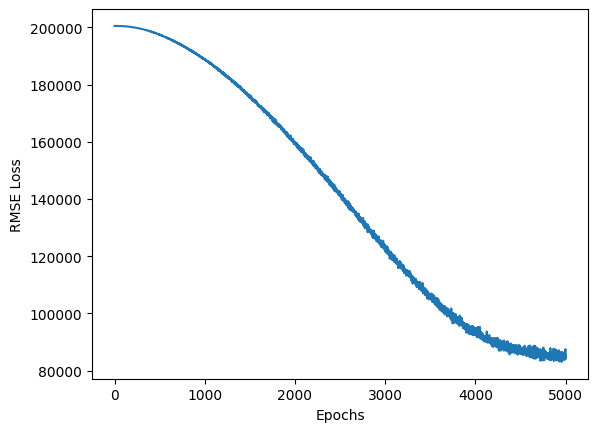

In [ ]:
# PLOTTING THE GRAPH:

plt.plot(range(epochs), final_losses)
plt.xlabel("Epochs")
plt.ylabel("RMSE Loss")

In [ ]:
cont_values.shape

torch.Size([1459, 5])

#### VALIDATE THE TEST DATA:

In [ ]:
with torch.no_grad():
    y_pred = model(cat_features,cont_values)

In [ ]:
soln = pd.DataFrame(y_pred , columns=["SalePrice"])
soln = soln.reset_index()
soln['index'] = soln['index']+1
soln.rename(columns={'index':"Id"}, inplace=True)
soln

,Id,SalePrice
0,1,117974.960938
1,2,179942.078125
2,3,231062.718750
3,4,161685.765625
4,5,144043.640625
...,...,...
1454,1455,219902.406250
1455,1456,165881.359375
1456,1457,152904.953125
1457,1458,186716.859375


In [ ]:
soln.to_csv("Submission.csv",index=False)

In [ ]:
Id = pd.read_csv("test.csv", usecols=["Id"])

In [ ]:
soln = pd.concat(Id,soln, axis=1)

In [53]:
# Loading The saved Model:
embs_size = [(15,8),(5,3),(2,1),(4,2)]
model1 =FeedForwardNN(embs_size,len(cont_feature),1,[100,50],p=0.4)
# Loading Model Weights:
model1.load_state_dict(torch.load("HousePriceWithWeights.pt"))

<All keys matched successfully>

In [49]:
model1.eval()

FeedForwardNN(
  (embds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [50]:
cat_features.shape , cont_values.shape

(torch.Size([1459, 4]), torch.Size([1459, 5]))

In [48]:
with torch.no_grad():
    y_pred = model1(cat_features,cont_values)

IndexError: index out of range in self